In [31]:
import numpy as np
from fm85 import FM85 
runs = 30
results = []
avgs = []
fm85 = FM85(256)
testvalues = np.unique(np.logspace(0, 3, num=200, dtype=int))
for i in testvalues:
    avgs.append(0)
for run in range(0,runs+1):
    fm85.resetBits()
    results.append([])
    counter = 0
    for i in range(1,1001): 
        fm85.add("item"+str(i)+str(run))
        if i in testvalues:
            res = fm85.query()
            avgs[counter] += ((res-i) / i * 100)
            # print(str(i) + "\t" + str(res))
            results[run].append(res)
            counter += 1
for i, val in enumerate(avgs):
    avgs[i] = val / runs

In [36]:
import numpy as np
from hll import HLL 
#%load_ext autoreload
#%autoreload 2
runs = 50
results = []
avgs = []
hll = HLL(16380)
testvalues = np.unique(np.logspace(0, 5, num=200, dtype=int))
for i in testvalues:
    avgs.append(0)
for run in range(0,runs+1):
    hll.resetBits()
    results.append([])
    counter = 0
    for i in range(1,100001): 
        hll.add("item"+str(i)+str(run))
        if i in testvalues:
            res = hll.query()
            avgs[counter] += ((res-i) / i * 100)
            results[run].append(res)
            counter += 1
for i, val in enumerate(avgs):
    avgs[i] = val / runs

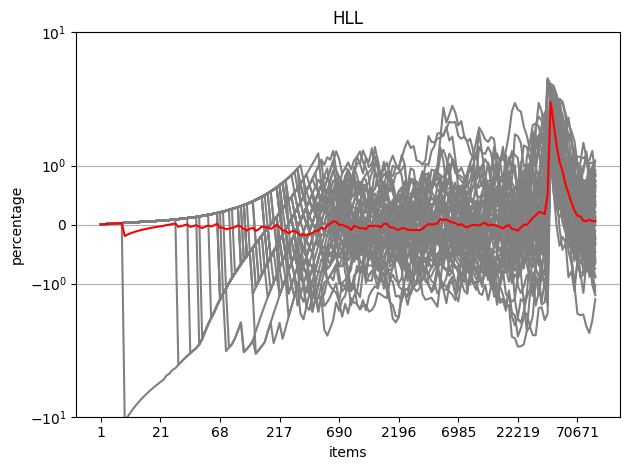

In [39]:
import matplotlib.pyplot as plt
for i, row in enumerate(results):
    percent_diff = ((row - testvalues) / testvalues * 100)
    plt.plot(percent_diff, color='grey') #, label=f'Row {i+1}')
plt.plot(avgs, color='red')    
step = 20
ticks = np.arange(0, len(testvalues), step)
plt.xticks(ticks=ticks, labels=[testvalues[i] for i in ticks])    
#plt.xticks(ticks=range(len(testvalues)), labels=testvalues)
plt.xlabel('items')
plt.yscale('symlog')
plt.ylim(-10, 10)
#plt.xlim(400,100000)
plt.ylabel('percentage')
plt.title('HLL')
plt.grid(True, which='both', axis='y')
plt.tight_layout()
#plt.show()
plt.savefig('hll_16380.pdf', dpi=300)
#plt.close()